# Pandas + RDKit: Working with Chemical CSV Data 📈⚗️

*General Chemistry & Cyberinfrastructure Skills Module*

## Learning Objectives
1. **Read** and **write** chemical data (SMILES + property columns) using **pandas** CSV I/O.
2. **Clean** datasets by removing invalid SMILES and missing values.
3. **Visualise** chemical property trends with matplotlib and seaborn, leveraging RDKit‐derived descriptors.

## Prerequisites
- Python ≥ 3.8
- **pandas** for tabular data handling
- **RDKit** for chemistry operations
- **matplotlib** / **seaborn** for plots

On Google Colab, run the install cell below first.

In [1]:
# !pip install rdkit-pypi pandas matplotlib seaborn -q  # ← Uncomment if needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors


## Step 1 – Load a CSV
To get started, we’ll create a **tiny sample CSV** on the fly. In real projects you’d load an existing file:

In [2]:
sample_csv = 'sample_mols.csv'
pd.DataFrame({
    'SMILES': ['CCO', 'c1ccccc1', 'invalid_smiles', 'O=C=O'],
    'IC50_nM': [120, 3000, 50, None]
}).to_csv(sample_csv, index=False)
print('Wrote sample CSV →', sample_csv)

Wrote sample CSV → sample_mols.csv


In [3]:
df = pd.read_csv(sample_csv)
df

,SMILES,IC50_nM
0,CCO,120.0
1,c1ccccc1,3000.0
2,invalid_smiles,50.0
3,O=C=O,NaN


## Step 2 – Clean the Dataset
We’ll parse each SMILES with RDKit; invalid strings become **NaN** in a new `Mol` column:

In [4]:
def smiles_to_mol(s):
    try:
        return Chem.MolFromSmiles(s)
    except Exception:
        return None

df['Mol'] = df['SMILES'].apply(smiles_to_mol)
clean = df.dropna(subset=['Mol', 'IC50_nM'])
print('Rows after cleaning:', len(clean))
clean

Rows after cleaning: 2


[20:08:34] SMILES Parse Error: syntax error while parsing: invalid_smiles
[20:08:34] SMILES Parse Error: Failed parsing SMILES 'invalid_smiles' for input: 'invalid_smiles'


,SMILES,IC50_nM,Mol
0,CCO,120.0,<rdkit.Chem.rdchem.Mol object at 0x160ce8cf0>
1,c1ccccc1,3000.0,<rdkit.Chem.rdchem.Mol object at 0x160ce8f90>


## Step 3 – Compute Descriptors
Let’s add molecular weight and logP using RDKit:

In [5]:
clean['MolWt'] = clean['Mol'].apply(Descriptors.MolWt)
clean['logP'] = clean['Mol'].apply(Descriptors.MolLogP)
clean

/var/folders/pq/nzssjf4s7wv93wh0v84tp2700000gn/T/ipykernel_36476/3410437298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['MolWt'] = clean['Mol'].apply(Descriptors.MolWt)
/var/folders/pq/nzssjf4s7wv93wh0v84tp2700000gn/T/ipykernel_36476/3410437298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['logP'] = clean['Mol'].apply(Descriptors.MolLogP)


,SMILES,IC50_nM,Mol,MolWt,logP
0,CCO,120.0,<rdkit.Chem.rdchem.Mol object at 0x160ce8cf0>,46.069,-0.0014
1,c1ccccc1,3000.0,<rdkit.Chem.rdchem.Mol object at 0x160ce8f90>,78.114,1.6866


## Step 4 – Visualise
Plot logP vs. IC₅₀ (nM) and colour by molecular weight:

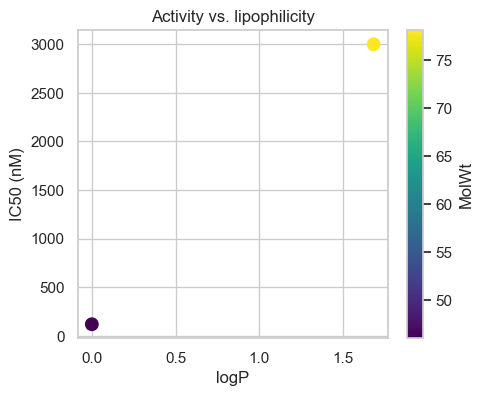

In [6]:
sns.set(style='whitegrid')
plt.figure(figsize=(5,4))
scatter = plt.scatter(clean['logP'], clean['IC50_nM'], c=clean['MolWt'], s=80, cmap='viridis')
plt.colorbar(scatter, label='MolWt')
plt.xlabel('logP')
plt.ylabel('IC50 (nM)')
plt.title('Activity vs. lipophilicity')
plt.show()

## Step 5 – Save Cleaned Data
Export the curated data (with descriptors) to a new CSV:

In [8]:
clean_out = 'cleaned_mols.csv'
cols_to_save = ['SMILES', 'IC50_nM', 'MolWt', 'logP']
clean[cols_to_save].to_csv(clean_out, index=False)
print('Cleaned CSV saved to:', clean_out)

Cleaned CSV saved to: cleaned_mols.csv


## Your Turn 📝
1. Replace `sample_csv` with **your own dataset** (or build a bigger one).  
2. Add at least **two more RDKit descriptors** (*TPSA*, *NumHBA*, etc.).  
3. Plot a pairplot (`sns.pairplot`) of descriptors vs. activity.  
4. Optional: use `pandas` group‐by or `qcut` to bin molecules by molecular weight and compare median activities.

## Summary & Next Steps
- **pandas** makes CSV I/O and cleaning straightforward.  
- **RDKit** can enrich each molecule with physicochemical descriptors.  
- **seaborn/matplotlib** provide quick insight into property trends.  
Expand this workflow to thousands of compounds, export to other formats (Parquet, Excel), or feed the cleaned data into ML models.